# Flight Bookin Price Prediction

 The objective is to analyze the flight 
booking dataset obtained from a 
platform which is used to book flight 
tickets. A thorough study of the data 
will aid in the discovery of valuable 
insights that will be of enormous 
value to passengers. Apply EDA, 
statistical methods and Machine 
learning algorithms in order to get 
meaningful information from it. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
flight_booking_data = pd.read_csv("Flight_Booking.csv")
flight_booking_data.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [9]:
# Data Wrangling
flight_booking_data = flight_booking_data.drop(columns=["Unnamed: 0"])

In [10]:
flight_booking_data.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
flight_booking_data.shape

(300153, 11)

In [12]:
flight_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [13]:
flight_booking_data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [14]:
#checking null values
flight_booking_data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

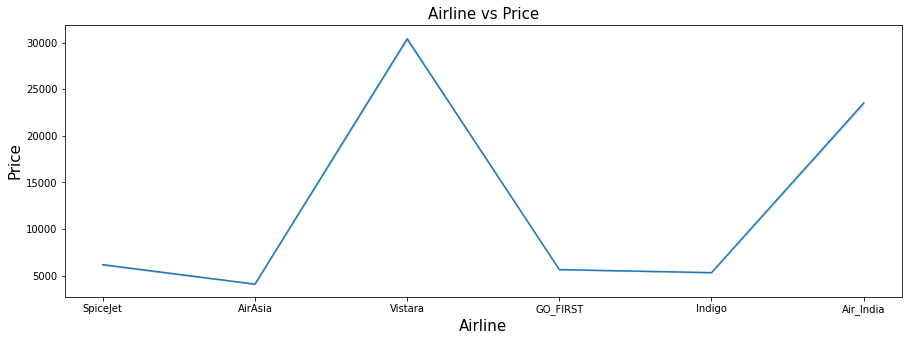

In [15]:
#Data Visuakization 
plt.figure(figsize=(15,5))
sns.lineplot(x=flight_booking_data['airline'], y=flight_booking_data['price'])
plt.title('Airline vs Price', fontsize=15)
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#there is variation in price with different airline

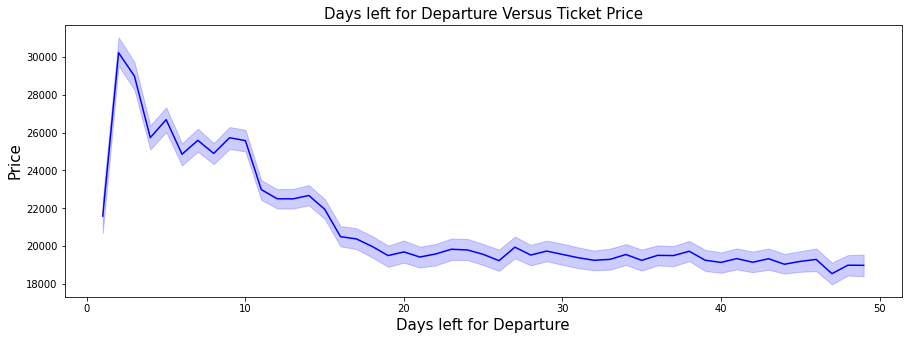

In [16]:
plt.figure(figsize=(15,5))
sns.lineplot(x=flight_booking_data['days_left'], y=flight_booking_data['price'], color='blue')
plt.title('Days left for Departure Versus Ticket Price', fontsize=15)
plt.xlabel('Days left for Departure', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.show()
#price of the ticket increase as the day left for departure decrease

<AxesSubplot: xlabel='airline', ylabel='price'>

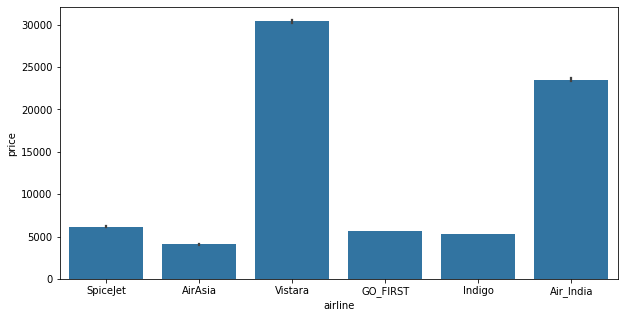

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline', y='price', data=flight_booking_data)

#price range of all the flights

<AxesSubplot: xlabel='class', ylabel='price'>

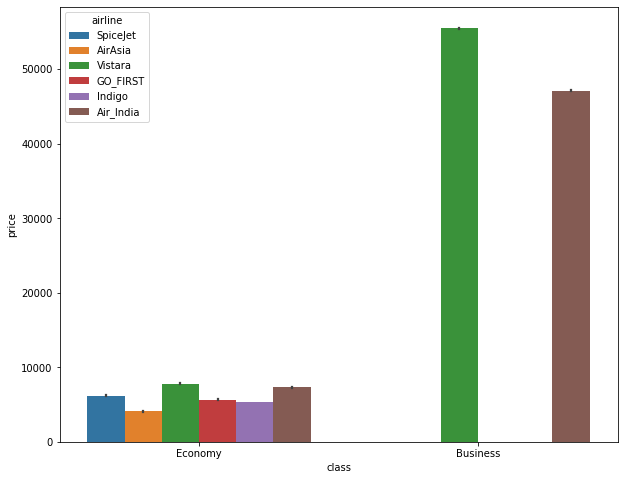

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x=flight_booking_data['class'], y=flight_booking_data['price'], hue=flight_booking_data['airline'])
#range of price of all the flights of Economy and Business class

<AxesSubplot: xlabel='days_left', ylabel='price'>

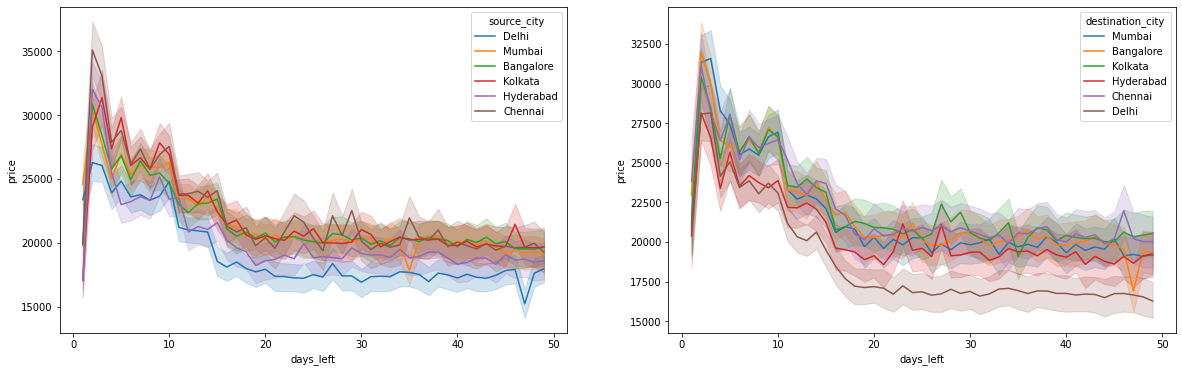

In [19]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left', y='price', data=flight_booking_data, hue='source_city', ax=ax[0])
sns.lineplot(x='days_left', y='price', data=flight_booking_data, hue='destination_city', ax=ax[1])
#Range of price of flights with source and Destination city according to the days left

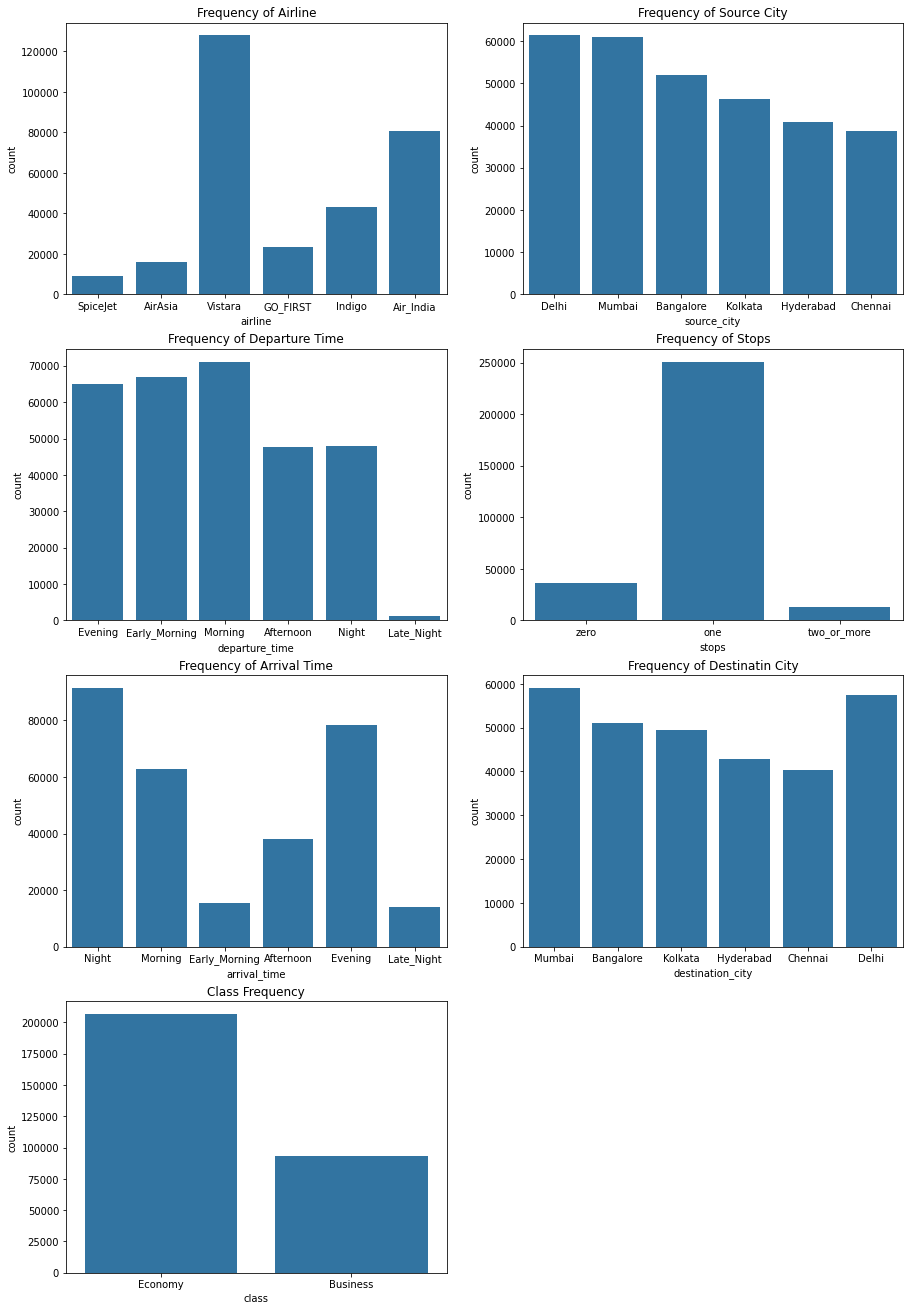

In [20]:
#Data visualization
plt.figure(figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x=flight_booking_data['airline'])
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=flight_booking_data['source_city'])
plt.title('Frequency of Source City')

plt.subplot(4,2,3)
sns.countplot(x=flight_booking_data['departure_time'])
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=flight_booking_data['stops'])
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=flight_booking_data['arrival_time'])
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=flight_booking_data['destination_city'])
plt.title("Frequency of Destinatin City")

plt.subplot(4,2,7)
sns.countplot(x=flight_booking_data['class'])
plt.title('Class Frequency')

plt.show()

In [21]:
#Performing one Hot incoding for categorical features of a dataframe

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
flight_booking_data['airline'] = le.fit_transform(flight_booking_data['airline'])
flight_booking_data['source_city'] = le.fit_transform(flight_booking_data['source_city'])
flight_booking_data['departure_time'] = le.fit_transform(flight_booking_data['departure_time'])
flight_booking_data['stops'] = le.fit_transform(flight_booking_data['stops'])
flight_booking_data['arrival_time'] = le.fit_transform(flight_booking_data['arrival_time'])
flight_booking_data['destination_city'] = le.fit_transform(flight_booking_data['destination_city'])
flight_booking_data['class'] = le.fit_transform(flight_booking_data['class'])
flight_booking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int32  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(7), int64(2), object(1)
memory usage: 17.2+ MB


C:\Users\Komal\AppData\Local\Temp\ipykernel_21376\136528525.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(flight_booking_data.corr(),annot=True,cmap='coolwarm')


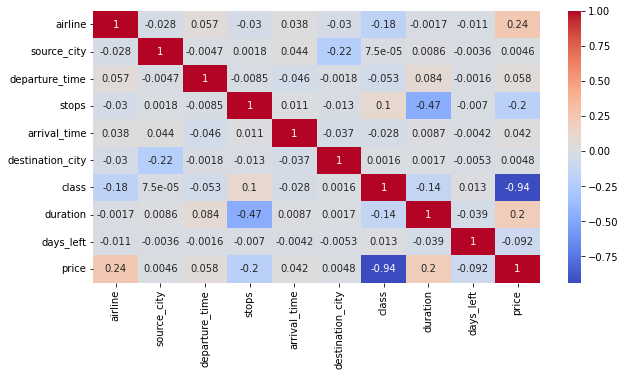

In [22]:
#plotting the correlation graph to see the correlation b/w features and dependent variable
plt.figure(figsize=(10,5))
sns.heatmap(flight_booking_data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [23]:
#selecting the features using VIF. VIF should be less than 5. so drop the stops feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = []
for col in flight_booking_data.columns:
    if ((flight_booking_data[col].dtype != 'object') & (col != 'price')):
        col_list.append(col)
        
X = flight_booking_data[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [44]:
flight_booking_data.drop(columns=['flight'], inplace=True)

In [45]:
#Applying standerdization and implementing Linear Regression Model to predict the Price og Flight
X = flight_booking_data.drop(columns=['price'])
Y = flight_booking_data['price']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
148417,1,4,0,0,4,1,1,19.42,6
36879,3,2,0,1,5,1,1,7.00,13
274531,1,4,0,0,0,1,0,21.17,44
166397,5,3,5,0,1,0,1,10.25,11
272722,5,4,5,0,5,1,0,26.50,5
...,...,...,...,...,...,...,...,...,...
119879,5,4,2,0,0,2,1,20.50,2
259178,5,0,5,0,5,1,0,25.42,7
131932,1,4,5,0,4,5,1,13.67,29
146867,2,4,0,0,5,3,1,8.33,39


In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(x_test)


In [51]:
difference = pd.DataFrame(np.c_[y_test,y_pred],columns=["Actual_Value","Predicted_Value"])
difference

,Actual_Value,Predicted_Value
0,7366.0,4585.880510
1,64831.0,52842.077073
2,6195.0,7877.980184
3,60160.0,56120.138579
4,6578.0,6663.204177
...,...,...
60026,5026.0,5829.230618
60027,3001.0,539.222230
60028,6734.0,5848.965500
60029,5082.0,-1498.061918


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
from sklearn import metrics
mean_abs_error = metrics.mean_absolute_error(y_test,y_pred)
mean_abs_error

4624.994868016998

In [53]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error


49200540.29372198

In [54]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

7014.309680483318

C:\Users\Komal\AppData\Local\Temp\ipykernel_21376\2629658088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label="Actual")
C:\Users\Komal\AppData\Local\Temp\ipykernel_21376\2629658088.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predicted")


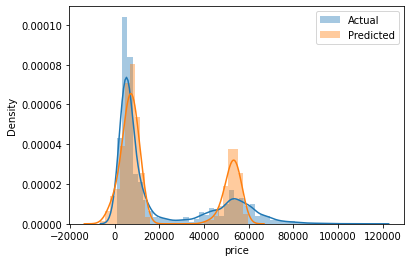

In [55]:
#Plotting the graph of actual and predicted price of flight
sns.distplot(y_test, label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()

In [56]:
#Decission Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [57]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [59]:
y_pred = dt.predict(x_test)
r2_score(y_test, y_pred)

0.9757469261977777

In [60]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1172.8198875025682

In [61]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07390411873749436

In [62]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

12502029.624603214

In [63]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

3535.8209265463674

In [65]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

In [66]:
rfr.fit(x_train, y_train)
y_pred = rfr.predict(x_test)
r2_score(y_test, y_pred)

0.9849721409171998

In [67]:
mean_abs_error = metrics.mean_absolute_error(y_test, y_pred)
mean_abs_error

1089.3086594641711

In [69]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.07049553328954462

In [70]:
mean_sq_error = metrics.mean_squared_error(y_test, y_pred)
mean_sq_error

7746594.966874483

In [71]:
root_mean_sq_error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
root_mean_sq_error

2783.2705522234955

C:\Users\Komal\AppData\Local\Temp\ipykernel_21376\3105095694.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label="Actual")
C:\Users\Komal\AppData\Local\Temp\ipykernel_21376\3105095694.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label="Predicted")


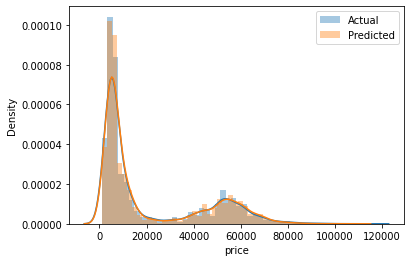

In [72]:
sns.distplot(y_test,label="Actual")
sns.distplot(y_pred, label="Predicted")
plt.legend()